In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "dataset/upi_transactions_2024.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [5]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [6]:
df.columns = df.columns.str.strip()

In [15]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.drop_duplicates()
df["amount (INR)"] = pd.to_numeric(df["amount (INR)"], errors="coerce")
df = df.dropna(subset=["amount (INR)"])
df["month"] = df["timestamp"].dt.month_name()
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["trx_bin"] = pd.qcut(
    df["amount (INR)"], q=4, labels=["Low", "Medium", "High", "Very High"]
)
df.reset_index(drop=True, inplace=True)
df.shape

(250000, 22)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction id      250000 non-null  object        
 1   timestamp           250000 non-null  datetime64[ns]
 2   transaction type    250000 non-null  object        
 3   merchant_category   250000 non-null  object        
 4   amount (INR)        250000 non-null  int64         
 5   transaction_status  250000 non-null  object        
 6   sender_age_group    250000 non-null  object        
 7   receiver_age_group  250000 non-null  object        
 8   sender_state        250000 non-null  object        
 9   sender_bank         250000 non-null  object        
 10  receiver_bank       250000 non-null  object        
 11  device_type         250000 non-null  object        
 12  network_type        250000 non-null  object        
 13  fraud_flag          250000 no

In [17]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,...,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,month_year,month,day,hour,trx_bin
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,...,4G,0,15,Tuesday,0,Oct 2024,October,8,15,High
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,...,4G,0,6,Thursday,0,Apr 2024,April,11,6,High
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,...,4G,0,13,Tuesday,0,Apr 2024,April,2,13,Medium
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,...,5G,0,10,Sunday,1,Jan 2024,January,7,10,Very High
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,...,WiFi,0,19,Tuesday,0,Jan 2024,January,23,19,High


In [27]:
total_amount = df["amount (INR)"].sum()
print(total_amount)

327939009


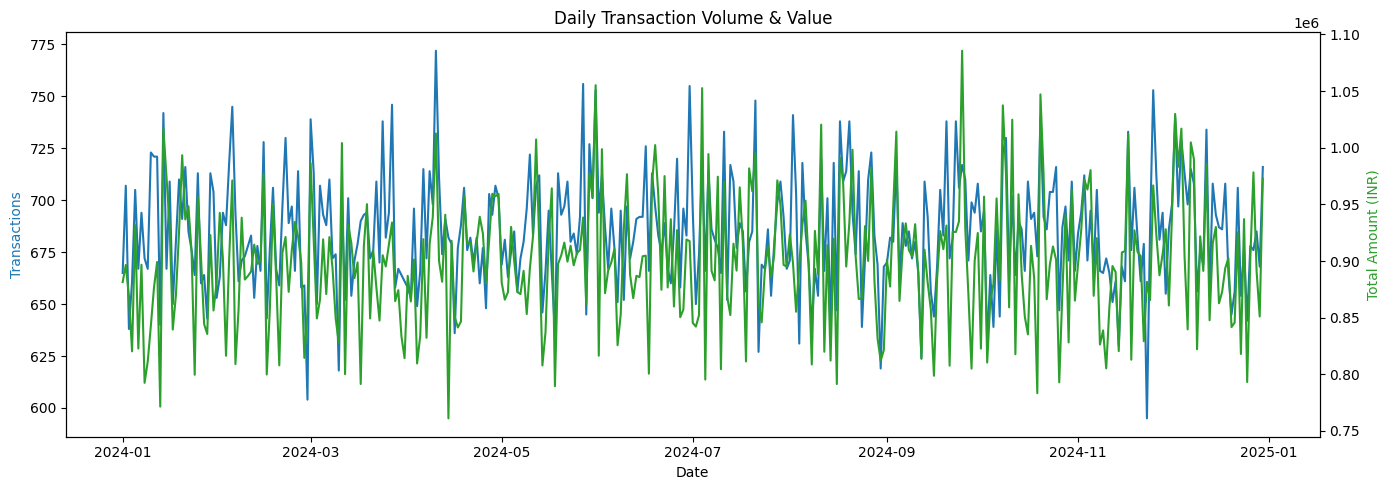

In [32]:
df["date"] = df["timestamp"].dt.date
daily_stats = df.groupby("date").agg({"transaction id": "count", "amount (INR)": "sum"})
fig, ax1 = plt.subplots(figsize=(14, 5))
color = "tab:blue"
ax1.set_xlabel("Date")
ax1.set_ylabel("Transactions", color=color)
ax1.plot(
    daily_stats.index, daily_stats["transaction id"], color=color, label="Transactions"
)
ax2 = ax1.twinx()
color = "tab:green"
ax2.set_ylabel("Total Amount (INR)", color=color)
ax2.plot(
    daily_stats.index, daily_stats["amount (INR)"], color=color, label="Total Amount"
)
plt.title("Daily Transaction Volume & Value")
fig.tight_layout()
plt.show()

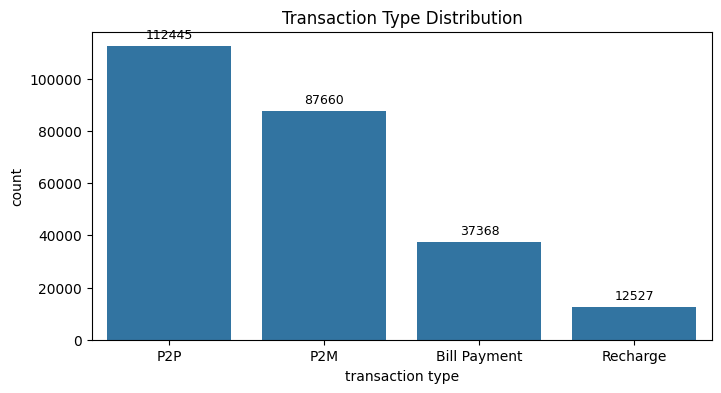

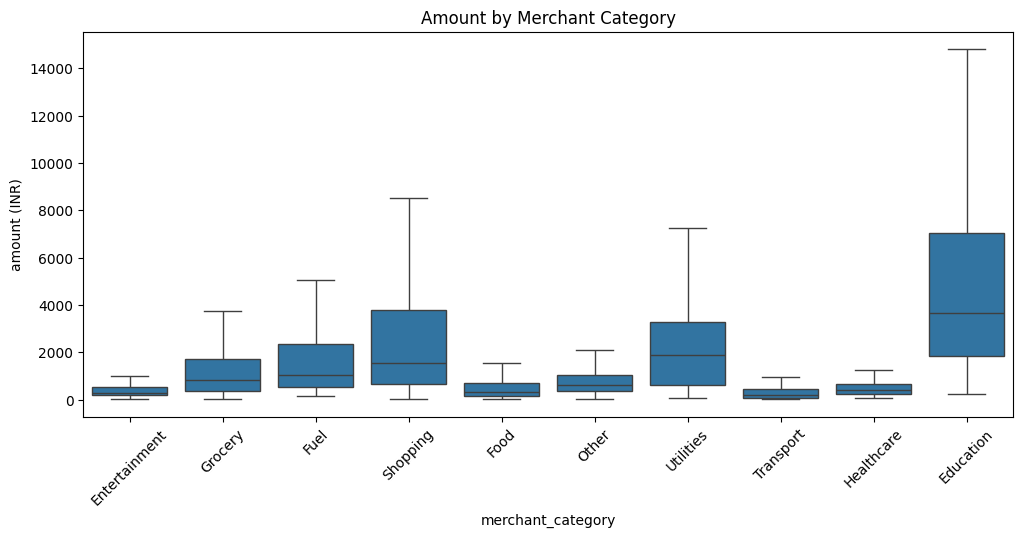

In [22]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df, x="transaction type", order=df["transaction type"].value_counts().index
)
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=9,
        color="black",
        xytext=(0, 8),
        textcoords="offset points",
    )
plt.title("Transaction Type Distribution")
plt.show()

plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=df, x="merchant_category", y="amount (INR)", showfliers=False)
plt.xticks(rotation=45)
plt.title("Amount by Merchant Category")
plt.show()

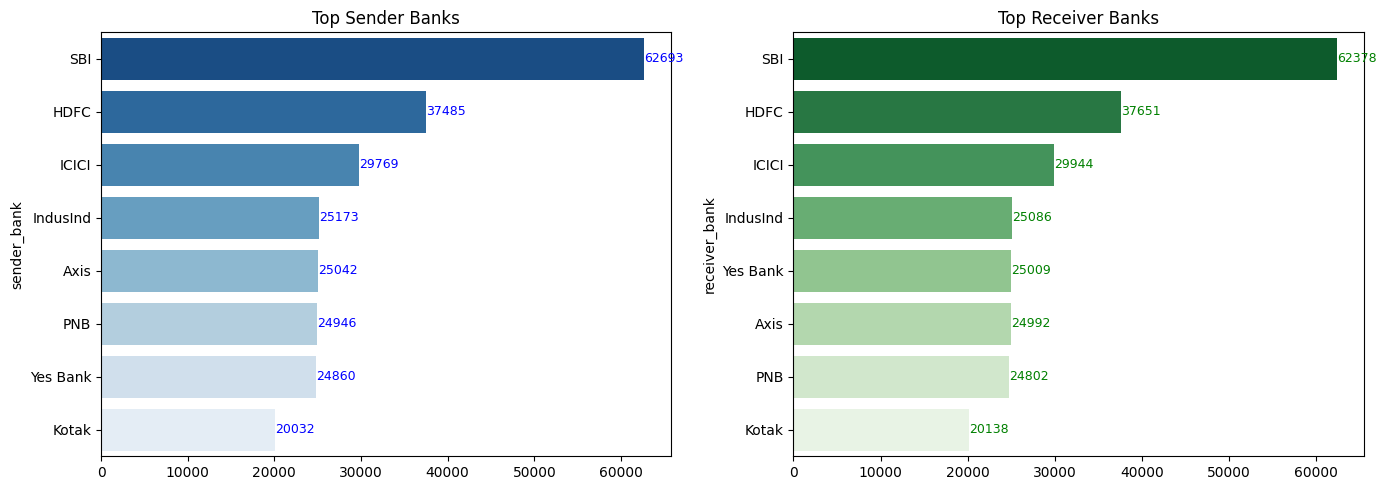

In [21]:
top_senders = df["sender_bank"].value_counts().head(10)
top_receivers = df["receiver_bank"].value_counts().head(10)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(y=top_senders.index, x=top_senders.values, ax=ax[0], palette="Blues_r")
for i, v in enumerate(top_senders.values):
    ax[0].text(v + 1, i, str(v), color="blue", va="center", fontsize=9)
ax[0].set_title("Top Sender Banks")
sns.barplot(y=top_receivers.index, x=top_receivers.values, ax=ax[1], palette="Greens_r")
for i, v in enumerate(top_receivers.values):
    ax[1].text(v + 1, i, str(v), color="green", va="center", fontsize=9)
ax[1].set_title("Top Receiver Banks")
plt.tight_layout()
plt.show()

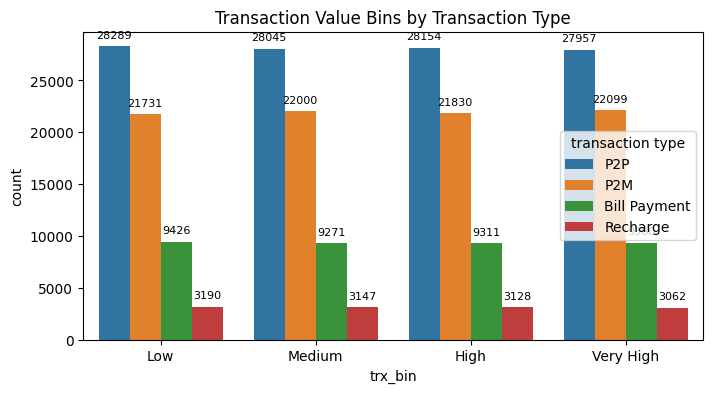

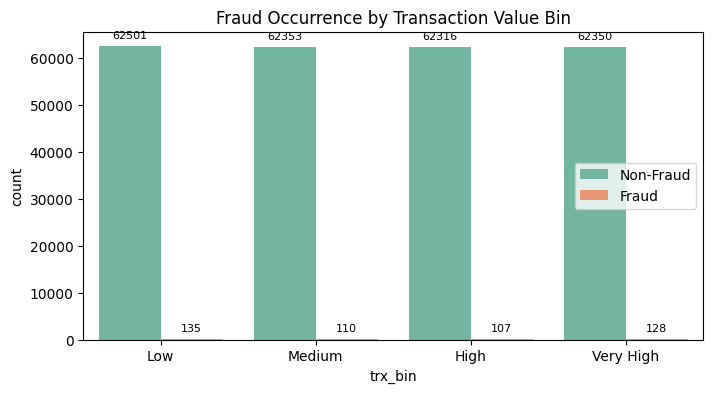

In [24]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="trx_bin", hue="transaction type")
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(
            height,
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=8,
            color="black",
            xytext=(0, 8),
            textcoords="offset points",
        )
plt.title("Transaction Value Bins by Transaction Type")
plt.show()

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="trx_bin", hue="fraud_flag", palette="Set2")
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(
            height,
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=8,
            color="black",
            xytext=(0, 8),
            textcoords="offset points",
        )
plt.title("Fraud Occurrence by Transaction Value Bin")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()